# Modelo de Predicción de Demanda de Taxis en Aeropuertos

-----

## Overview

### Descripción

<div style="color: #196CC4;">
Sweet Lift Taxi busca mejorar la asignación de conductores durante las horas pico en los aeropuertos mediante la predicción precisa de la demanda de pedidos de taxis. Utilizando datos históricos de pedidos, se desarrollará un modelo de pronóstico de series temporales.
 </div>

### Objetivo

<div style="color: #196CC4;">
Construir un modelo de pronóstico de series temporales que pueda predecir con precisión la cantidad de pedidos de taxis en los aeropuertos durante la próxima hora, para anticipar la demanda y asignar recursos de manera más eficiente, mejorando así la satisfacción del cliente y la eficiencia operativa. El éxito se medirá por la capacidad del modelo para cumplir con un umbral de error especificado en la predicción de la demanda.
</div>

### Recursos

<div style="color: #196CC4;">
<b>Características</b><br>
▶ datetime - momento del pedido<br>
▶ num_orders - número de pedidos<br>
</div>

### Metodología

<div style="color: #196CC4;">
<ol>
<li><strong>Inicialización y Análisis Exploratorio de Datos</strong>
<ul>
<li>Se importan librerías, módulos y un dataset: taxi.csv</li>
<li>Se realiza un entendimiento general del conjunto de datos con correlaciones preliminares entre fecha, hora y número de viajes solicitados</li>
<li>Estadística descriptiva</li>
<li>Se realiza un análisis de outliers, observando los valores atípicos, media y considerando +- 3 desviaciones estándar</li>
<li>Se remuestrean los datos en intervalos de 1 hora y se verifica que estén en orden cronológico</li>
<li>Al ser una serie temporal y no combinar múltiples características no hay necesidad de escalar los datos</li>
<li>Para feature engineering se consideran Series como año, mes, día, día de la semana para obtener información adicional relacionada con la estacionalidad de la solicitud de taxis</li>
<li>Visualización de nuevo DataFrame con los cambios realizados y gráfica para visualizar el número de pedidos a través del tiempo y su Media Móvil. También se hace un zoom para observar a detalle el comportamiento de la Media Móvil</li>
<li>Análisis de los datos remuestreados para comprender mejor la distribución de los pedidos de taxis en el tiempo con datos originales, tendencia, estacionalidad y ruido. Se observa una tendencia no estacionaria</li>

</ul>
</li>

<li><strong>Entrenamiento</strong>
<ul>

<li>Se dividen los datos en entrenamiento y prueba con una proporción de 9:1 </li>
<li>Se utilizan Regresión Lineal, Random Forest y LGBM con RMSE (Root Mean Squared Error) y tiempo de predicción para realizar un análisis de la calidad de las predicciones</li></ul>
</li>

<li><strong>Evaluación de los modelos</strong>
    <ul>
<li>Se muestra un resumen de los resultados y métricas obtenidas para cada uno de los modelos utilizados</li>
<li>Se realiza un análisis de la calidad de las predicciones </li>
<li>Se realiza un análisis de la velocidad de predicción y tiempo de entrenamiento de cada modelo</li>

</ul>
</li>

<li><strong>Conclusiones</strong>
    <ul>
<li>Se selecciona el mejor modelo en términos de rendimiento en precisión</li>
    </ul>
</li>
</ol>

</div>

-----

## Información General

### Inicialización

In [1]:
# Data analysis
import pandas as pd

# Split data
from sklearn.model_selection import train_test_split

# Numerical operations
import numpy as np

# Math
import math

# Statistic Models
import statsmodels.api as sm

# Testing sets
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error
import time

# Time Series decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Statistical models & time series analysis methods
import statsmodels.api as sm

# Data visualization
import matplotlib.pyplot as plt

# Model training
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Gradient boosting model training
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [2]:
# Import data
taxis = pd.read_csv('datasets/taxi.csv', index_col=[0], parse_dates=[0])

### Despliegue de dataset

<div style="color: #196CC4;">
▶ Propiedades generales del Dataframe
</div>

In [3]:
# General Dataframe properties
taxis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


<div style="color: #196CC4;">
▶ Vistazo general del Dataframe
</div>

In [4]:
# General data overview
display(taxis.head(3))

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28


<div style="color: #196CC4;">
▶ Estadísticas descriptivas para los datos numéricos.
</div>

In [5]:
# Descriptive statistics
taxis.describe(percentiles=np.arange(0,1,0.1))

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
0%,0.000000
10%,4.000000
20%,7.000000
30%,9.000000
40%,11.000000
50%,13.000000


### Observaciones iniciales

<div style="color: #196CC4;">
▶ Los nombres de las Series están en minúsculas<br>
▶ Todas las Series serán indispensables para el proyecto<br>
▶ No existen valores ausentes<br>
▶ La Serie "num_orders" es de tipo "object", pero debería de ser de tipo fecha<br>
▶ De acuerdo a la estadística descriptiva, se muestran valores atípicos en la Serie "num_orders"
</div>

-----

## Análisis Exploratorio de Datos (EDA)

### Outliers

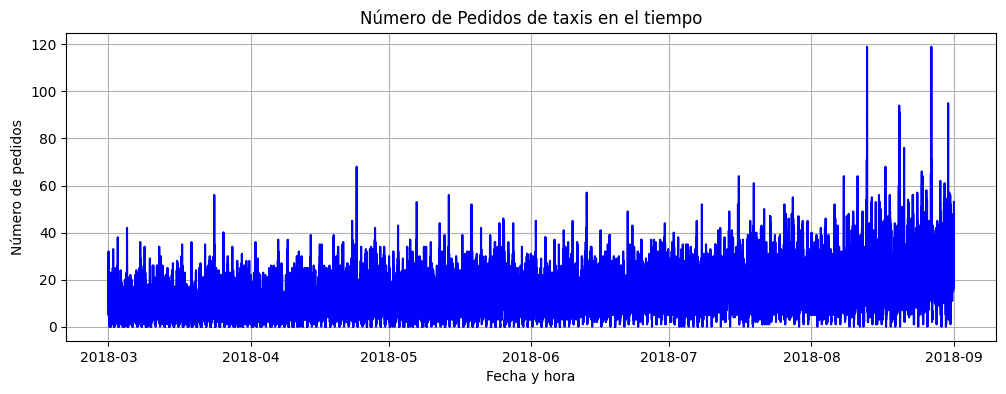

In [6]:
# Boxplot
plt.figure(figsize=(12, 4))
plt.plot(taxis['num_orders'], color='blue')
plt.title('Número de Pedidos de taxis en el tiempo')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.show()

<div style="color: #196CC4;">
<b>Valores atípicos</b><br>    
▶ De acuerdo a los datos de estadística descriptiva, los valores de "num_orders" van desde 0 hasta 119 y la media es de media 14.07. Considerando que el valor máximo de 119, está bastante alejado de los percentiles 75%, puede considerarse un valor atípico potencialmente.<br>
▶ A continuación se muestra un diagrama de caja para visualizar la distribución de datos para "num_orders".
</div>

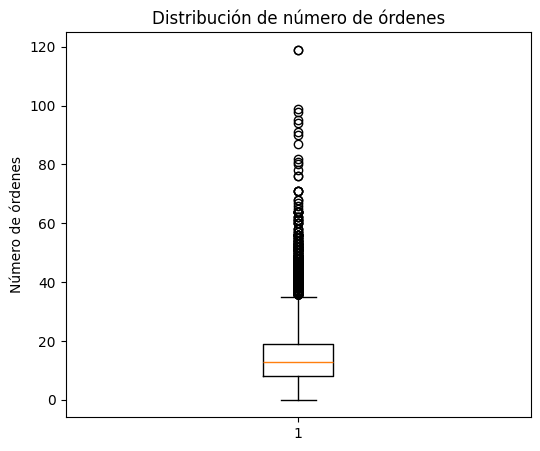

In [7]:
# Boxplot
plt.figure(figsize=(6, 5))
plt.boxplot(taxis['num_orders'])
plt.title('Distribución de número de órdenes')
plt.ylabel('Número de órdenes')
plt.show()

<div style="color: #196CC4;">
<b>Media y desviación estándar</b><br>
▶ A continuación se calculan los valores específicos para la media y la desviación estándar de "num_orders"
</div>

In [8]:
# Mean and the Standard Deviation
mean_num = taxis['num_orders'].mean()
std_num = taxis['num_orders'].std()

# Print
print("Media de la columna 'num_orders':", mean_num)
print("Desviación estandar de la columna 'num_orders':", std_num)

Media de la columna 'num_orders': 14.070463466183575
Desviación estandar de la columna 'num_orders': 9.211329545049038


<div style="color: #196CC4;">
▶ Basándonos en estos valores, los límites para identificar los valores atípicos serán ±3 desviaciones estándar de la media.
</div>


In [9]:
# Limit Outliers
lower_bound_num = mean_num - 3 * std_num
upper_bound_num = mean_num + 3 * std_num

<div style="color: #196CC4;">
▶ A continuación se utilizan estos límites para identificar y eliminar los valores atípicos.
</div>

In [10]:
# Delete Outliers
taxis = taxis[(taxis['num_orders'] >= lower_bound_num) & (taxis['num_orders'] <= upper_bound_num)]

<div style="color: #196CC4;">
▶ Verificando estadística descriptiva
</div>

In [11]:
# Descriptive statistics
taxis.describe(percentiles=np.arange(0,1,0.1))

,num_orders
count,26179.000000
mean,13.630314
std,8.251699
min,0.000000
0%,0.000000
10%,4.000000
20%,6.000000
30%,9.000000
40%,11.000000
50%,12.000000


<div style="color: #196CC4;">
▶ Despliegue de datos después de eliminar valores atípicos
</div>

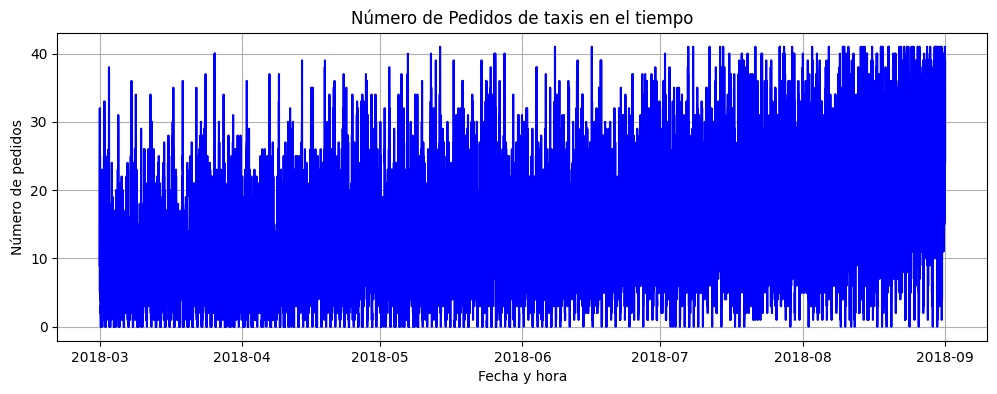

In [12]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(taxis['num_orders'], color='blue')
plt.title('Número de Pedidos de taxis en el tiempo')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.show()

### Remuestreo

<div style="color: #196CC4;">
▶ A continuación se ordena el DataFrame taxis según su índice, se re-muestrean los datos del DataFrame taxis en intervalos de 1 hora ('1H'), sumando los valores dentro de cada intervalo y se verifica que las fechas y horas están en orden cronológico, con 'is_monotonic'.

In [13]:
taxis.sort_index(inplace=True)
taxis = taxis.resample('1H').sum()

# Is monotonic increasing?
print(taxis.index.is_monotonic_increasing)

True


C:\Users\dguez\AppData\Local\Temp\ipykernel_5780\3355078505.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  taxis = taxis.resample('1H').sum()


### Escalamiento de datos

<div style="color: #196CC4;">
▶ Al trabajar solo con una serie temporal y no combinar múltiples características de diferentes escalas, no hay necesidad de escalar los datos para este proyecto.</div>

In [14]:
# Print
taxis

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [15]:
# Dataframe copy for time series models
taxis_default = taxis.copy()

### Feature Engineering

<div style="color: #196CC4;">
▶ Es conveniente incluir características básicas como año, mes, día y día de la semana en tu conjunto de datos para el análisis de series temporales. Estas características pueden proporcionar información adicional sobre la variación estacional, mensual o diaria en el número de pedidos de taxis<br>
▶ Agregar características de retraso (lag), puede capturar relaciones de dependencia temporal entre los valores pasados y presentes de la serie temporal<br>
▶ Considerar la Media Móvil también puede ser beneficioso porque puede suavizar las fluctuaciones de corto plazo y resaltar tendencias a largo plazo
</div>

In [16]:
def make_features(data, max_lag, rolling_mean_size):
    
    # New time features
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

    # Delay
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    # Moving Average
    data['rolling_mean'] = (data['num_orders'].shift().rolling(rolling_mean_size).mean())

In [17]:
# New features function
make_features(taxis, 6, 20)

### Despliegue de información

<div style="color: #196CC4;">
▶ A continuación verifico los cambios realizados en las propiedades del DataFrame 'taxis' y su previsualización.<br>
</div>

In [18]:
taxis

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,2018,8,31,4,165.0,173.0,197.0,116.0,133.0,166.0,123.15
2018-08-31 20:00:00,154,2018,8,31,4,136.0,165.0,173.0,197.0,116.0,133.0,122.20
2018-08-31 21:00:00,159,2018,8,31,4,154.0,136.0,165.0,173.0,197.0,116.0,126.20


<div style="color: #196CC4;">
▶ A continuación se muestra la gráfica completa con su media móvil<br>
</div>

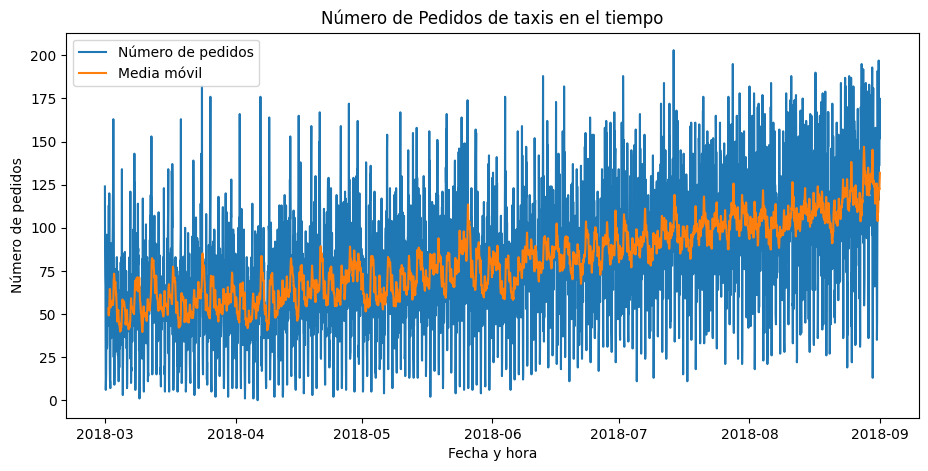

In [19]:
# Selected series
series_1 = taxis['num_orders']
series_2 = taxis['rolling_mean']

# Graph
plt.figure(figsize=(11, 5))  
plt.plot(series_1, label='Número de pedidos')
plt.plot(series_2, label='Media móvil')

# Labels
plt.xlabel('Fecha y hora')
plt.ylabel('Número de pedidos')
plt.title('Número de Pedidos de taxis en el tiempo')
plt.legend() 

# Print
plt.show()

<div style="color: #196CC4;">
▶ A continuación se muestra un zoom a la gráfica para ver con mayor detalle el patrón que sigue la media móvil<br>
</div>

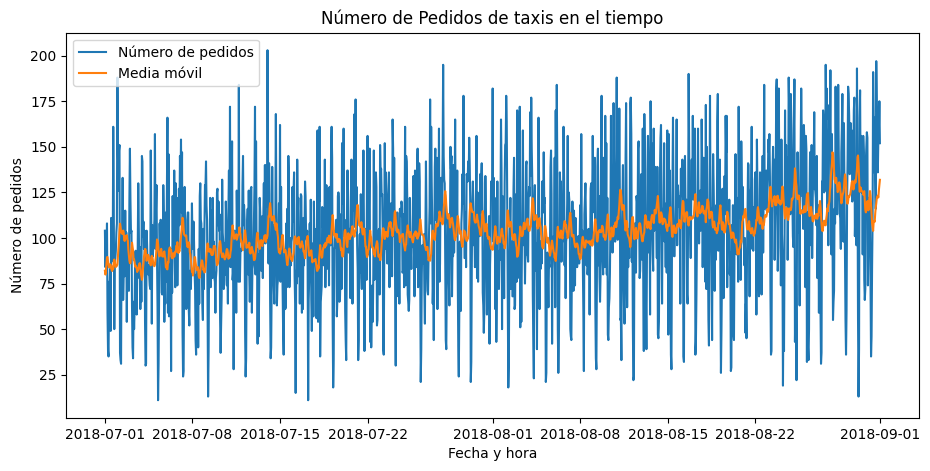

In [20]:
# Selected series
series_1 = taxis['2018-07-01':'2018-09-30']['num_orders']
series_2 = taxis['2018-07-01':'2018-09-30']['rolling_mean']

# Graph
plt.figure(figsize=(11, 5))  
plt.plot(series_1, label='Número de pedidos')
plt.plot(series_2, label='Media móvil')

# Labels
plt.xlabel('Fecha y hora')
plt.ylabel('Número de pedidos')
plt.title('Número de Pedidos de taxis en el tiempo')
plt.legend() 

# Print
plt.show()

<div style="color: #196CC4;">
▶ A continuación se verifican las propiedades y overview de los datos listos para el entrenamiento
</div>

In [21]:
# Data displayment
taxis.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: h
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_orders    4416 non-null   int64  
 1   year          4416 non-null   int32  
 2   month         4416 non-null   int32  
 3   day           4416 non-null   int32  
 4   dayofweek     4416 non-null   int32  
 5   lag_1         4415 non-null   float64
 6   lag_2         4414 non-null   float64
 7   lag_3         4413 non-null   float64
 8   lag_4         4412 non-null   float64
 9   lag_5         4411 non-null   float64
 10  lag_6         4410 non-null   float64
 11  rolling_mean  4396 non-null   float64
dtypes: float64(7), int32(4), int64(1)
memory usage: 508.5 KB


In [22]:
# Data displayment
display(taxis.head(25))

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,rolling_mean
datetime,,,,,,,,,,,,
2018-03-01 00:00:00,124,2018,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,2018,3,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2018,3,1,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,2018,3,1,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,2018,3,1,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN
2018-03-01 05:00:00,6,2018,3,1,3,43.0,66.0,71.0,85.0,124.0,NaN,NaN
2018-03-01 06:00:00,12,2018,3,1,3,6.0,43.0,66.0,71.0,85.0,124.0,NaN
2018-03-01 07:00:00,15,2018,3,1,3,12.0,6.0,43.0,66.0,71.0,85.0,NaN
2018-03-01 08:00:00,34,2018,3,1,3,15.0,12.0,6.0,43.0,66.0,71.0,NaN


### Análisis de datos remuestreados

<div style="color: #196CC4;">
▶ A continuación se realiza un análisis exploratorio de los datos remuestreados para comprender mejor la distribución de los pedidos de taxis en el tiempo.

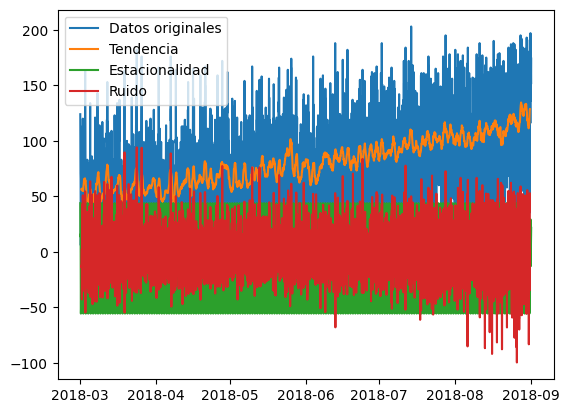

In [23]:
# Decomposition
descomposicion = sm.tsa.seasonal_decompose(taxis['num_orders'], model='additive')

# Trend extraction
trend = descomposicion.trend 

# Seasonality extraction
seasonality = descomposicion.seasonal 

# Noise extraction
noise = descomposicion.resid

# Plots
plt.plot(taxis['num_orders'], label='Datos originales') 
plt.plot(trend, label='Tendencia') 
plt.plot(seasonality, label='Estacionalidad') 
plt.plot(noise, label='Ruido') 
plt.legend() 

# Print
plt.show()

<div style="color: #196CC4;">
▶ A continuación se muestra la descomposición estacional de una serie temporal. 
</div>


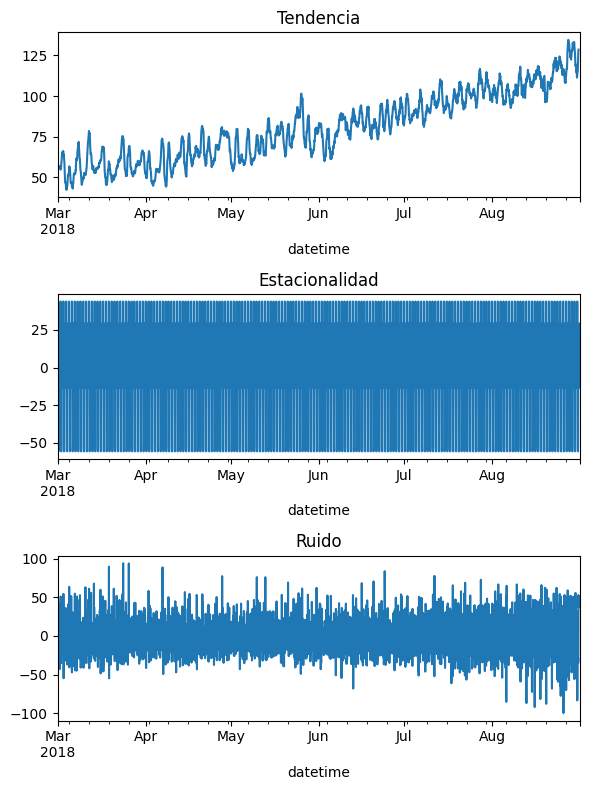

In [24]:
# Decompose
decomposed = seasonal_decompose(taxis['num_orders'])

# Plot size
plt.figure(figsize=(6, 8))

# Trend
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Tendencia') 

# Seasonality
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Estacionalidad') 

# Residuals
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Ruido') 

plt.tight_layout()

<div style="color: #196CC4;">
<b>Análisis</b><br>
▶ En las gráficas anteriores se puede mostrar una tendencia no estacionaria, ya que su valor va aumentando con el tiempo. Esto quiere decir que hay un aumento constante en la demanda de taxis a través del tiempo.<br>
▶ La estacionalidad tiene patrones repetitivos y consistentes a través del tiempo, por lo que la estabilidad de los factores contribuye a la falta de cambio aparente en estos ciclos estacionales.
</div>

-----

## Entrenamiento

### División de datos

<div style="color: #196CC4;">
<b>A continuación se dividen los datos fuente de la siguiente manera para llegar a una proporción de 6:2:2</b><br>
▶ 60% Dataset para el entrenamiento<br>
▶ 20% Dataset de validación <br>
▶ 20% Dataset de prueba<br><br>
Cuanto más grande sea el conjunto de entrenamiento, más datos tendrá el modelo para aprender patrones y relaciones en los datos. Por otro lado el dataset de validación servirá para evaluar el rendimiento del modelo y el dataset de prueba esperará al final para evaluar el rendimiento final del modelo  (cuando haya terminado el proceso de entrenamiento y validación).
</div>

In [25]:
# Split the data into a training set (60%), a test set (20%) and validation set (20%)
df_train, df_temp = train_test_split(taxis, shuffle=False, test_size=0.4)
df_test, df_valid = train_test_split(df_temp, shuffle=False, test_size=0.5)

# Drop rows with missing values from training set
df_train = df_train.dropna()


In [26]:
min_size = min(len(df_valid), len(df_test))
df_valid = df_valid.sample(n=min_size, random_state=42)
df_test = df_test.sample(n=min_size, random_state=42)

<div style="color: #196CC4;">
▶ En estas líneas de código se están preparando los datos para el entrenamiento, validación y la prueba de un modelo de aprendizaje automático. Se realiza una separación entre las características (features) y la variable objetivo (target) en cada conjunto de datos.<br>
</div>

In [27]:
# Extract features and target variables from the training, test and validation sets
features_train = df_train.drop(['num_orders'], axis=1)
target_train = df_train['num_orders']

features_valid = df_valid.drop(['num_orders'], axis=1)
target_valid = df_valid['num_orders']

features_test = df_test.drop(['num_orders'], axis=1)
target_test = df_test['num_orders']


In [28]:
print("Size of features_train", len(features_train))
print("Size of target_train:", len(target_train))
print("Size of features_valid:", len(features_valid))
print("Size of target_valid:", len(target_valid))
print("Size of features_test:", len(features_test))
print("Size of target_test:", len(target_test))

Size of features_train 2629
Size of target_train: 2629
Size of features_valid: 883
Size of target_valid: 883
Size of features_test: 883
Size of target_test: 883


### Regresión Lineal

<div style="color: #196CC4;">
▶ La regresión lineal es un modelo que asume que hay una relación recta entre las características de un objeto y su valor, de esta forma trata de encontrar la línea recta que mejor se ajusta a los datos para hacer predicciones. </div>

In [29]:
# Model
linear_reg = LinearRegression()

# Train
rlineal_start_train_time = time.time()
linear_reg.fit(features_train, target_train)

# Training time
rlineal_end_train_time = time.time()
rlineal_train_time = rlineal_end_train_time - rlineal_start_train_time

# Price prediction
rlineal_start_pred_time = time.time()
linear_reg_pred_train = linear_reg.predict(features_train)
linear_reg_pred_test = linear_reg.predict(features_valid)

# Predictions time
rlineal_end_pred_time = time.time()
rlineal_pred_time = rlineal_end_pred_time - rlineal_start_pred_time

In [30]:
# Quality of trainning metrics
rlineal_train_mse = mean_squared_error(target_train, linear_reg_pred_train)
rlineal_train_rmse = rlineal_train_mse ** 0.5

# Quality of prediction metrics
rlineal_pred_mse = mean_squared_error(target_test, linear_reg_pred_test)
rlineal_pred_rmse = rlineal_pred_mse ** 0.5

# Print LinealRegression
print("Modelo Regresión lineal")
print()

# Print metrics
print("Root Mean Squared Error (RMSE):", rlineal_pred_rmse)

# Print time
print("Tiempo de predicción:", rlineal_pred_time, "seconds")

Modelo Regresión lineal

Root Mean Squared Error (RMSE): 39.006888531251484
Tiempo de predicción: 0.003063201904296875 seconds


### Random Forest

<div style="color: #196CC4;">
▶ El Random Forest es un conjunto de muchos árboles de decisión que trabajan juntos. Cada árbol se entrena con diferentes partes del conjunto de datos y sus resultados se combinan para hacer una predicción más precisa y robusta.</div>

In [31]:
# Parameters
param_dist_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 3, 5],
    'min_samples_split': [2, 4, 6]
}

# Randomized search & cross-validation
random_search_forest = RandomizedSearchCV(RandomForestRegressor(random_state=12345), param_dist_forest, scoring='neg_mean_squared_error', cv=2, n_iter=10)

# Training
forest_start_train_time = time.time()
random_search_forest.fit(features_train, target_train)

# Training time
forest_end_train_time = time.time()
forest_train_time = forest_end_train_time - forest_start_train_time

# Best model
best_model_forest = random_search_forest.best_estimator_

# Print best model parameters
print("Best model parameters:")
print(best_model_forest.get_params())

# Predictions
forest_start_pred_time = time.time()
predicted_train_forest_random = best_model_forest.predict(features_train)
predicted_test_forest_random = best_model_forest.predict(features_valid)

# Predictions time
forest_end_pred_time = time.time()
forest_pred_time = forest_end_pred_time - forest_start_pred_time

Best model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 12345, 'verbose': 0, 'warm_start': False}


In [32]:
# Quality of prediction metrics
forest_train_mse = mean_squared_error(target_train, predicted_train_forest_random)
forest_train_rmse = forest_train_mse ** 0.5

# Quality of prediction metrics
forest_pred_mse = mean_squared_error(target_test, predicted_test_forest_random)
forest_pred_rmse = forest_pred_mse ** 0.5

# Print Random Forest
print("Modelo Random Forest")
print()

# Print metrics
print("Root Mean Squared Error (RMSE):", forest_pred_rmse)

# Print time
print("Tiempo de predicción:", forest_pred_time, "seconds")

Modelo Random Forest

Root Mean Squared Error (RMSE): 38.40394117955199
Tiempo de predicción: 0.01508474349975586 seconds


### LGBM

<div style="color: #196CC4;">
▶ <b>LGBM</b> es un algoritmo de potenciación de gradiente que también utiliza árboles de decisión; es muy eficiente y rápido, ideal para grandes conjuntos de datos. LGBM también entrena árboles uno tras otro, cada uno aprendiendo de los errores del anterior para mejorar la predicción.</div>

In [33]:
# Hyperparameters
lgbm = LGBMRegressor(
    objective='regression',
    num_leaves=35,
    seed=23
)

# Training
lgbm_start_train_time = time.time()
lgbm.fit(features_train, target_train)

# Training time
lgbm_end_train_time = time.time()
lgbm_train_time = lgbm_end_train_time - lgbm_start_train_time

# Predictions
lgbm_start_pred_time = time.time()
lgbm_predicted_train = lgbm.predict(features_train)
lgbm_predicted_test = lgbm.predict(features_valid)

# Predictions time
lgbm_end_pred_time = time.time()
lgbm_pred_time = lgbm_end_pred_time - lgbm_start_pred_time

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 2629, number of used features: 10
[LightGBM] [Info] Start training from score 67.178775


c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\dguez\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [34]:
# Quality of trainning metrics
lgbm_train_mse = mean_squared_error(target_train, lgbm_predicted_train)
lgbm_train_rmse = lgbm_train_mse ** 0.5

# Quality of prediction metrics
lgbm_pred_mse = mean_squared_error(target_test, lgbm_predicted_test)
lgbm_pred_rmse = lgbm_pred_mse ** 0.5

# Print LGBM
print("Modelo LGBM")
print()

# Print metrics
print("Root Mean Squared Error (RMSE):", lgbm_pred_rmse)

# Print time
print("Tiempo de predicción:", lgbm_pred_time, "seconds")

Modelo LGBM

Root Mean Squared Error (RMSE): 42.68348936984633
Tiempo de predicción: 0.007999658584594727 seconds


-----

## Evaluación de modelos

### Resumen de métricas

<div style="color: #196CC4;">
▶ A continuación se muestran todas las métricas obtenidas para todos los modelos utilizados a lo largo del proyecto
</div>

In [35]:
# Data
modelos = [
    "Regresión lineal",
    "Random Forest",
    "LGBM"
]

rmse = [
    rlineal_pred_rmse,
    forest_pred_rmse,
    lgbm_pred_rmse
]

pred_time = [
    rlineal_pred_time,
    forest_pred_time,
    lgbm_pred_time
]

# DataFrame
df_pred_metrics = pd.DataFrame({
    "Modelo": modelos,
    "Root Mean Squared Error (RMSE)": rmse,
    "Tiempo de predicción (segundos)": pred_time
})

# Print
display(df_pred_metrics)

,Modelo,Root Mean Squared Error (RMSE),Tiempo de predicción (segundos)
0,Regresión lineal,39.006889,0.003063
1,Random Forest,38.403941,0.015085
2,LGBM,42.683489,0.008000


### Análisis de calidad de predicciones

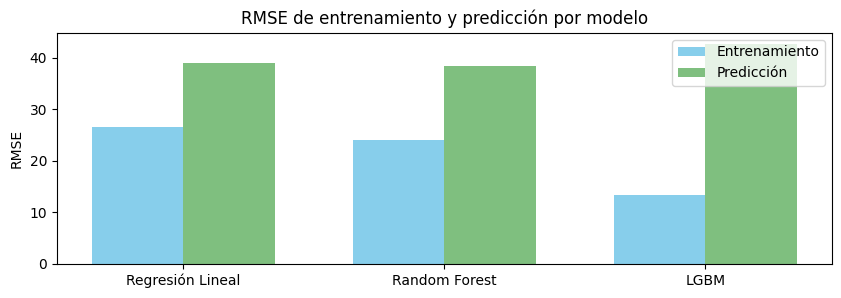

In [36]:
# Data
modelos = ['Regresión Lineal', 'Random Forest', 'LGBM']
rmse_entrenamiento = [rlineal_train_rmse, forest_train_rmse, lgbm_train_rmse]
rmse_prediccion = [rlineal_pred_rmse, forest_pred_rmse, lgbm_pred_rmse]

# Bar width
bar_width = 0.35

# Bar position
posiciones_entrenamiento = range(len(modelos))
posiciones_prediccion = [p + bar_width for p in posiciones_entrenamiento]

# Graph
plt.figure(figsize=(10, 3))
plt.bar(posiciones_entrenamiento, rmse_entrenamiento, width=bar_width, color='skyblue', label='Entrenamiento')
plt.bar(posiciones_prediccion, rmse_prediccion, width=bar_width, color='green', alpha=0.5, label='Predicción')

# Print
plt.title('RMSE de entrenamiento y predicción por modelo')
plt.ylabel('RMSE')
plt.xticks([p + bar_width / 2 for p in posiciones_entrenamiento], modelos)
plt.legend()
plt.show()

<div style="color: #196CC4;">
<b>Precision de entrenamiento - RMSE (Root Mean Squared Error):</b><br>
▶ El modelo LGBM tiene el RMSE más bajo en el conjunto de entrenamiento, lo que indica un mejor ajuste a los datos de entrenamiento, por lo que el modelo LGBM es más capaz de capturar las relaciones complejas entre las características de entrada y la variable objetivo durante el entrenamiento.<br>
<b>Precision de predicción - RMSE (Root Mean Squared Error):</b><br>
▶ Random Forest tiene un RMSE de predicción más bajo que los otros modelos, por lo que tiene mejor rendimiento con nuevos datos. Por otro lado LGBM y Regresión Lineal siguen siendo competitivos.
</div>

### Análisis de velocidad y tiempo

<div style="color: #196CC4;">
<b>Tiempo de Entrenamiento:</b><br>
▶ La regresión lineal tiene un tiempo de entrenamiento significativamente más bajo en comparación con los otros modelos; esto significa que es más rápido para entrenar.
    
<b>Velocidad de Predicción:</b><br>
▶ La regresión lineal tiene el tiempo de predicción más bajo, lo que la hace ideal para aplicaciones donde se necesita una respuesta rápida.
</div>      

-----

## Conclusiones

### Selección del modelo final

<div style="color: #196CC4;">
El Random Forest es el modelo que ofrece el mejor equilibrio entre precisión y tiempo de predicción. Aunque tiene un tiempo de predicción mayor que la Regresión Lineal, su RMSE más bajo indica que realiza las predicciones más precisas. La precisión en la predicción es crítica en la mayoría de los casos y la diferencia en el tiempo de predicción es relativamente pequeña comparada con la mejora en la precisión que proporciona.
</div>    

In [40]:
# Parameters
best_params_forest = {
    'max_depth': 5,
    'max_features': 1.0,
    'min_samples_leaf': 3,
    'min_samples_split': 2,
    'n_estimators': 50,
    'random_state': 12345
}

# Initialize Model
final_forest_model = RandomForestRegressor(**best_params_forest)

# Train with combined sets
features_combined_train = pd.concat([features_train, features_valid])
target_combined_train = pd.concat([target_train, target_valid])

forest_start_train_time = time.time()
final_forest_model.fit(features_combined_train, target_combined_train)

# Training time
forest_end_train_time = time.time()
forest_train_time = forest_end_train_time - forest_start_train_time

# Test predictions
forest_start_pred_time = time.time()
predicted_test_forest_final = final_forest_model.predict(features_test)

# Predictions time
forest_end_pred_time = time.time()
forest_pred_time = forest_end_pred_time - forest_start_pred_time


In [41]:

# Metrics
forest_test_mse = mean_squared_error(target_test, predicted_test_forest_final)
forest_test_rmse = forest_test_mse ** 0.5

# Print
print("Modelo Final Random Forest - Entrenado con el conjunto combinado de entrenamiento y validación")
print()
print("Root Mean Squared Error (RMSE) en el conjunto de test:", forest_test_rmse)
print("Tiempo de predicción:", forest_pred_time, "seconds")

Modelo Final Random Forest - Entrenado con el conjunto combinado de entrenamiento y validación

Root Mean Squared Error (RMSE) en el conjunto de test: 30.698909298336
Tiempo de predicción: 0.0060002803802490234 seconds


### Conclusiones

<div style="color: #196CC4;">
El modelo final de Random Forest, entrenado con el conjunto combinado de entrenamiento y validación, muestra una mejora significativa en el RMSE comparado con los modelos evaluados previamente. El RMSE del modelo final es el más bajo entre todos los modelos comparados, indicando una mejor precisión en las predicciones del número de órdenes en el conjunto de test.
</div>    